In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

plt.rcParams['figure.figsize'] = (20, 10)
sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [2]:
#read in data
df_main = pd.read_csv('genres_v2.csv')

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Data Cleaning ##

In [4]:
# get unique genres
df_main.genre.unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

In [5]:
# data set is relatively clean already, so minimal cleaning is needed
take_notna = lambda s1,s2: s1 if type(s1) == str else s2
df_main["song_title"]=df_main["song_name"].combine(df_main["title"],take_notna, fill_value=None)
df_main.drop(columns = ["song_name","title","Unnamed: 0"], inplace=True)
df_main.dropna(inplace=True)


## Train Test Split right away

In [4]:
X = df_main
y = df_main.loc[:, 'genre']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1010010)

In [87]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

## EDA

In [33]:
#get summary statistics for each feature
for feature in X_train.columns.values:
    print(X_train[feature].describe())

count    25383.000000
mean         0.639196
std          0.156629
min          0.065100
25%          0.524000
50%          0.645000
75%          0.767000
max          0.988000
Name: danceability, dtype: float64
count    25383.000000
mean         0.763125
std          0.183083
min          0.000243
25%          0.632000
50%          0.803000
75%          0.923000
max          1.000000
Name: energy, dtype: float64
count    25383.000000
mean         5.362290
std          3.659705
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max         11.000000
Name: key, dtype: float64
count    25383.000000
mean        -6.456466
std          2.915512
min        -29.478000
25%         -8.159500
50%         -6.232000
75%         -4.506000
max          3.148000
Name: loudness, dtype: float64
count    25383.000000
mean         0.547571
std          0.497742
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000

In [34]:
X_train.columns.unique()

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [88]:
#since any genre can be in any key (major or minor), I dropped key and mode, along with other features that only serve to identify specific tracks
X_train_numeric = X_train[['danceability', 'energy', 'loudness',
                     'speechiness', 'acousticness', 'instrumentalness', 'liveness', 
                     'valence', 'tempo']]

X_val_numeric = X_val[['danceability', 'energy', 'loudness',
                     'speechiness', 'acousticness', 'instrumentalness', 'liveness', 
                     'valence', 'tempo']]

X_test_numeric = X_test[['danceability', 'energy', 'loudness',
                     'speechiness', 'acousticness', 'instrumentalness', 'liveness', 
                     'valence', 'tempo']]

In [89]:
numeric_columns= X_train_numeric.columns

In [90]:
#scaling data for consistent plotting
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_train_scaled = pd.DataFrame(X_train_scaled)

X_train_scaled.columns = numeric_columns

X_val_scaled = scaler.fit_transform(X_val_numeric)
X_val_scaled = pd.DataFrame(X_val_scaled)

X_test_scaled = scaler.fit_transform(X_test_numeric)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [91]:
X_train_scaled['genre'] = y_train
X_val_scaled['genre'] = y_val

In [45]:
X_train_scaled.head(5)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,-1.399487,0.906027,0.877210,-0.127208,-0.563195,-0.761303,-0.523356,-0.248139,-0.851925,NaN
1,-1.080255,1.244679,0.664207,-0.696231,-0.564550,1.640447,2.027473,0.043157,-0.441486,NaN
2,-0.531177,1.020732,0.456692,-0.510250,-0.532245,-0.763242,-0.387009,-0.620826,0.109774,Dark Trap
3,-0.339638,0.583762,0.824045,0.276410,-0.553359,0.516715,1.277563,-0.432340,0.105251,Dark Trap
4,1.716214,-1.071261,0.094485,1.170702,-0.477877,-0.763297,-0.790938,-0.440908,-0.482827,Dark Trap


In [46]:
#individual genre DFs

Dark_Trap = X_train_scaled[(X_train_scaled.genre=='Dark Trap')]
Underground_Rap = X_train_scaled[(X_train_scaled.genre=='Underground Rap')]
Trap_Metal = X_train_scaled[(X_train_scaled.genre=='Trap Metal')]
Emo = X_train_scaled[(X_train_scaled.genre=='Emo')]
Rap = X_train_scaled[(X_train_scaled.genre=='Rap')]
RnB = X_train_scaled[(X_train_scaled.genre=='RnB')]
Pop = X_train_scaled[(X_train_scaled.genre=='Pop')]
Hiphop = X_train_scaled[(X_train_scaled.genre=='Hiphop')]
techhouse = X_train_scaled[(X_train_scaled.genre=='techhouse')]
techno = X_train_scaled[(X_train_scaled.genre=='techno')]
trance = X_train_scaled[(X_train_scaled.genre=='trance')]
psytrance = X_train_scaled[(X_train_scaled.genre=='psytrance')]
trap = X_train_scaled[(X_train_scaled.genre=='trap')]
dnb = X_train_scaled[(X_train_scaled.genre=='dnb')]
hardstyle = X_train_scaled[(X_train_scaled.genre=='hardstyle')]

In [47]:
def get_dist_plot(feature):
    # returns an overlaid distplot of a single feature for each genre
    plt.figure(figsize=(12,10))
    sns.distplot(Dark_Trap[feature], label='Dark_Trap', hist=False, kde_kws={"shade": True})
    sns.distplot(Underground_Rap[feature], label='Underground_Rap', hist=False, kde_kws={"shade": True})
    sns.distplot(Trap_Metal[feature], label='Trap_Metal', hist=False, kde_kws={"shade": True})
    sns.distplot(Emo[feature], label='Emo', hist=False, kde_kws={"shade": True})
    sns.distplot(Rap[feature], label='Rap', hist=False, kde_kws={"shade": True})
    sns.distplot(RnB[feature], label='RnB', hist=False, kde_kws={"shade": True})
    sns.distplot(Pop[feature], label='Pop', hist=False, kde_kws={"shade": True})
    sns.distplot(Hiphop[feature], label='Hiphop', hist=False, kde_kws={"shade": True})
    sns.distplot(techhouse[feature], label='techhouse', hist=False, kde_kws={"shade": True})
    sns.distplot(techno[feature], label='techno', hist=False, kde_kws={"shade": True})
    sns.distplot(trance[feature], label='trance', hist=False, kde_kws={"shade": True})
    sns.distplot(psytrance[feature], label='psytrance', hist=False, kde_kws={"shade": True})
    sns.distplot(trap[feature], label='trap', hist=False, kde_kws={"shade": True})
    sns.distplot(dnb[feature], label='dnb', hist=False, kde_kws={"shade": True})
    sns.distplot(hardstyle[feature], label='hardstyle', hist=False, kde_kws={"shade": True})
    plt.legend(loc='upper left', fontsize=17)
    plt.title(feature.capitalize(), size=32)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

Text(0.5, 1.0, 'Existing Data Set')

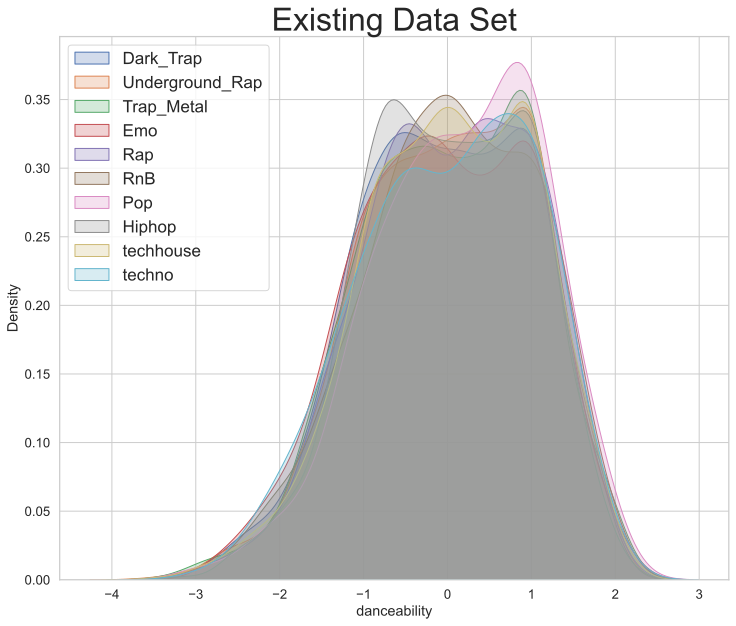

In [48]:
get_dist_plot('danceability')
plt.title('Existing Data Set', size=32)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

Text(0.5, 1.0, 'Existing Data Set')

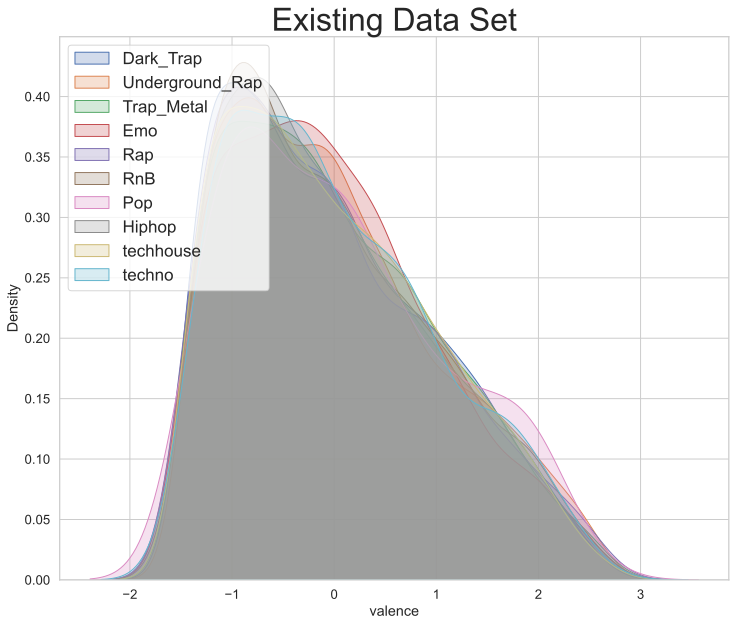

In [49]:
get_dist_plot('valence')
plt.title('Existing Data Set', size=32)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

Text(0.5, 1.0, 'Existing Data Set')

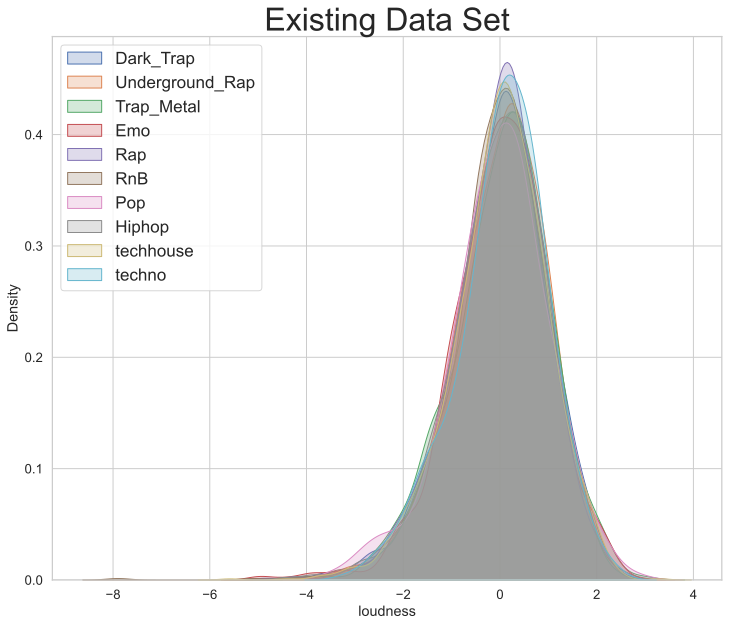

In [50]:
get_dist_plot('loudness')
plt.title('Existing Data Set', size=32)

In [54]:
#descriptive statistics on slimmed data set
for genre in X_train_scaled.genre.unique():
    print(genre, X_train_scaled.loc[X_train_scaled['genre'] == genre].describe())

nan        danceability  energy  loudness  speechiness  acousticness  \
count           0.0     0.0       0.0          0.0           0.0   
mean            NaN     NaN       NaN          NaN           NaN   
std             NaN     NaN       NaN          NaN           NaN   
min             NaN     NaN       NaN          NaN           NaN   
25%             NaN     NaN       NaN          NaN           NaN   
50%             NaN     NaN       NaN          NaN           NaN   
75%             NaN     NaN       NaN          NaN           NaN   
max             NaN     NaN       NaN          NaN           NaN   

       instrumentalness  liveness  valence  tempo  
count               0.0       0.0      0.0    0.0  
mean                NaN       NaN      NaN    NaN  
std                 NaN       NaN      NaN    NaN  
min                 NaN       NaN      NaN    NaN  
25%                 NaN       NaN      NaN    NaN  
50%                 NaN       NaN      NaN    NaN  
75%                

techhouse        danceability       energy     loudness  speechiness  acousticness  \
count   1790.000000  1790.000000  1790.000000  1790.000000   1790.000000   
mean       0.030531    -0.018764    -0.007126     0.005639      0.002983   
std        0.996880     1.027333     0.988878     0.997850      1.029013   
min       -3.455977    -3.903372    -5.576328    -0.883795     -0.565249   
25%       -0.690793    -0.780403    -0.574536    -0.690691     -0.555412   
50%        0.062594     0.228724     0.051438    -0.489277     -0.476117   
75%        0.847904     0.882813     0.646714     0.482177      0.056427   
max        2.195061     1.293838     3.294328     4.882408      5.194189   

       instrumentalness     liveness      valence        tempo  
count       1790.000000  1790.000000  1790.000000  1790.000000  
mean          -0.002054    -0.021979    -0.007889    -0.038354  
std            0.989482     0.977754     0.987633     0.988211  
min           -0.763316    -1.136351    -1.43

In [28]:
#check class balance
y_train.value_counts()

Underground Rap    4667
Dark Trap          3627
Hiphop             2451
trap               2407
techhouse          2402
trance             2395
dnb                2385
psytrance          2365
techno             2348
hardstyle          2328
RnB                1679
Trap Metal         1579
Rap                1499
Emo                1343
Pop                 369
Name: genre, dtype: int64

In [92]:
#drop genre
X_train_scaled = X_train_scaled.drop(columns=['genre'])
X_val_scaled = X_val_scaled.drop(columns=['genre'])

## Modeling

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
#test knn
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)
print("Training: {:6.2f}%".format(100*knn.score(X_train_scaled, y_train)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_val_scaled, y_val)))

Training:  64.14%
Validation set:  56.40%


In [64]:
from sklearn.linear_model import LogisticRegression

In [66]:
#test logistic
logit = LogisticRegression()
logit.fit(X_train_scaled, y_train)
print("Training: {:6.2f}%".format(100*logit.score(X_train_scaled, y_train)))
print("Test set: {:6.2f}%".format(100*logit.score(X_val_scaled, y_val)))

Training:  53.98%
Test set:  53.29%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
# test randomforest
rf = RandomForestClassifier(n_estimators=500, max_depth=15, random_state=99)
rf.fit(X_train_scaled, y_train)
print("Training: {:6.2f}%".format(100*rf.score(X_train_scaled, y_train)))
print("Validation set: {:6.2f}%".format(100*rf.score(X_val_scaled, y_val)))


Training:  90.38%
Validation set:  63.75%


In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

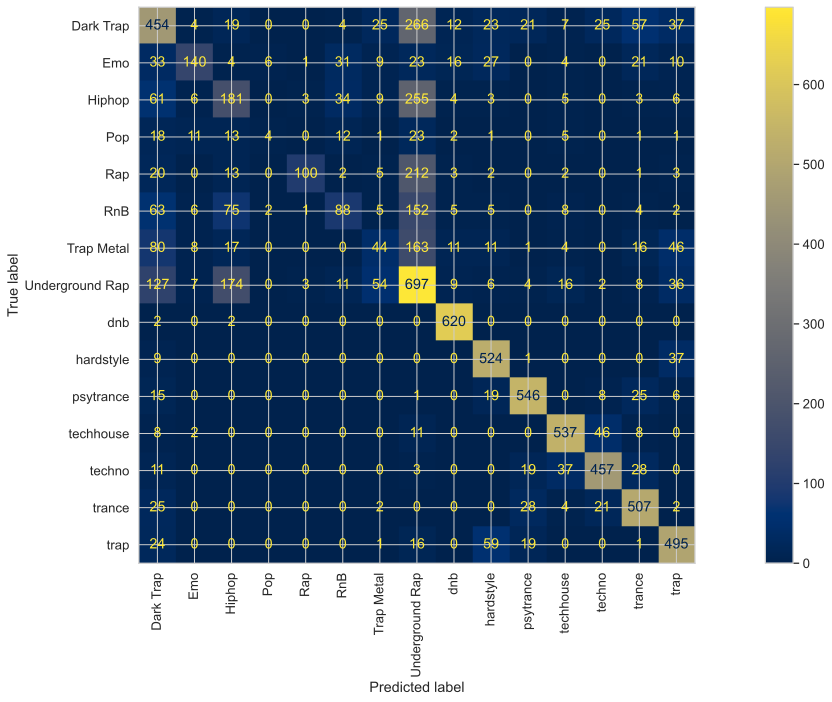

In [71]:
#random forest conf matrix
plot_confusion_matrix(rf, X_val_scaled, y_val, cmap=plt.cm.cividis, xticks_rotation='vertical')
plt.tight_layout()
plt.savefig("mvp_randomforest_conf_mat.png")

In [72]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

In [74]:
#test naive bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
print("Training: {:6.2f}%".format(100*nb.score(X_train_scaled, y_train)))
print("Validation set: {:6.2f}%".format(100*nb.score(X_val_scaled, y_val)))

Training:  55.41%
Validation set:  54.99%
